[Think Stats Chapter 3 Exercise 1](http://greenteapress.com/thinkstats2/html/thinkstats2004.html#toc31) (actual vs. biased)

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household. Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

This notebook has been converted to a markdown file using [convert_notebooks_to_markdown.py](./convert_notebooks_to_markdown.py).

# Answer

The unbiased and biased mean number of children is 1.0 and 2.4, respectively.

|      |   unbiased |   biased |
|:-----|-----------:|---------:|
| mean |      1.024 |    2.404 |



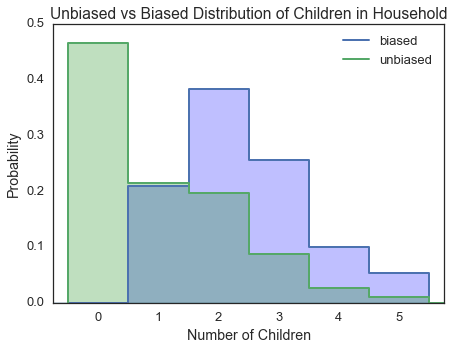

In [10]:
print('The unbiased and biased mean number of children is {:.1f} and {:.1f}, respectively.'
      .format(household_kids_means.unbiased.values[0], household_kids_means.biased.values[0]))
print('')
print(household_kids_means_md)
print('')
plt.show()

# Code

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from load_ThinkStats import load_survey_data

%matplotlib inline
%config InlineBackend.close_figures = False

This uses a custom library I wrote called [`load_ThinkStats`](load_ThinkStats.py).

In [3]:
df = load_survey_data('2002FemResp', columns=['numkdhh'])

## Calculate unbiased and biased distributions

Sum the number of households with varying number of children to determine the distribution. Then compute the biased distribution and normalize everything.

In [4]:
# Calculate totals for each number of children
household_kids = ( df.numkdhh
                     .value_counts()
                     .to_frame()
                     .reset_index()
                     .rename(columns={'index':'num_kids', 
                                      'numkdhh':'unbiased'})
                  )

# Compute the baised counts
household_kids['biased'] = household_kids.unbiased * household_kids.num_kids

# Normalize data
household_kids[['unbiased','biased']] /= household_kids[['unbiased','biased']].sum()

Print the table in markdown syntax since this worksheet is converted to markdown.

In [5]:
print(tabulate(household_kids.set_index('num_kids'), 
               headers=list(household_kids.columns),
               tablefmt='pipe',
               floatfmt=".3f")
      )

|   num_kids |   unbiased |   biased |
|-----------:|-----------:|---------:|
|      0.000 |      0.466 |    0.000 |
|      1.000 |      0.214 |    0.209 |
|      2.000 |      0.196 |    0.383 |
|      3.000 |      0.087 |    0.255 |
|      4.000 |      0.026 |    0.100 |
|      5.000 |      0.011 |    0.052 |


## Distribution means

Calculate the average number of children for both the unbiased and biased distributions.

In [6]:
household_kids_means = ( household_kids[['unbiased','biased']]
                         .mul(household_kids.num_kids, axis=0)
                         .sum()
                         .to_frame()
                         .rename(columns={0:'mean'})
                         .transpose()
                        )

In [7]:
household_kids_means_md = tabulate(household_kids_means,
                                   headers=list(household_kids_means.columns),
                                   tablefmt='pipe',
                                   floatfmt=".3f")

print(household_kids_means_md)

|      |   unbiased |   biased |
|:-----|-----------:|---------:|
| mean |      1.024 |    2.404 |


## Visualize PMFs

Plot the PMFs for the unbiased and biased distributions.

In [8]:
# First pad beginning and end with zero-value data for better step-plotting

klim = [household_kids.num_kids.min(), 
        household_kids.num_kids.max()]

pad_values = pd.DataFrame(dict(num_kids=[klim[0]-1,
                                         klim[1]+1], 
                               unbiased=[0,0], 
                               biased=[0,0]),
                          columns=['num_kids','unbiased','biased'])

household_kids = ( pd.concat([household_kids, pad_values])
                   .sort_values('num_kids')
                   .reset_index(drop=True)
                  )

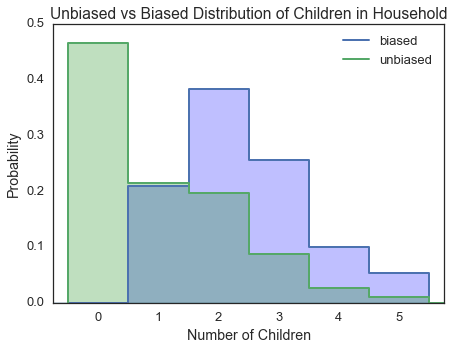

In [9]:
# Make the plot
sns.set_context('talk')
sns.set_style('white')

fig = plt.figure()
fig.set_size_inches(7, 5)

ax = plt.axes()

ax = ( household_kids[['biased','unbiased']]
         .plot(kind='line', 
               drawstyle='steps',
               lw=2.0,
               xlim=(klim[0]-0.25, klim[1]+1.25),
               figsize=(7,5),
               ax=ax)
      )

ax.fill_between(household_kids.num_kids, household_kids.biased, 
                interpolate=False, step='post', 
                color='blue', alpha=0.25, zorder=-1)

ax.fill_between(household_kids.num_kids, household_kids.unbiased, 
                interpolate=False, step='post', 
                color='green', alpha=0.25, zorder=-1)

ax.set_xlabel('Number of Children')
ax.set_ylabel('Probability')
ax.set_title('Unbiased vs Biased Distribution of Children in Household')

xticks = ax.get_xticks()[1:-2].astype(np.int)
_ = ax.set_xticks(xticks+0.5)
_ = ax.set_xticklabels(xticks)